In [ ]:
# For Google collab add these lines

#from google.colab import output
#output.enable_custom_widget_manager()

In [ ]:
# remove "capture" line, if you have any troubles with packages, and try to run again
%%capture
%pip install ipympl

In [ ]:
%matplotlib widget

In [1]:
import matplotlib.patches as pltp
import matplotlib.pyplot as plt
import numpy as np
import sympy as sp
from matplotlib import animation
from matplotlib.animation import FuncAnimation, PillowWriter
from numpy import pi, array
from sympy import Symbol, Ellipse, Point, Line, symbols, Eq, solve

# Task 1

In [2]:
# Given constants
w = 2
phi = 52
a = 32
b = 4
c = 39
d = 19
e = 32
O_1A = 12
O_2D = 32
O_3E = 18
AB = 46
AD = 29
GH = 14
DE = 53
GF = 25
FH = 14
O_4G = 20
BC = AB / 3
DF = 3 / 5 * DE

In [3]:
# Parameters for simulation
t = np.linspace(0, 2 * np.pi, 100)
ang = Symbol('ang')

In [4]:
# Points which are not moving
O_1 = np.array([0, 0])
O_2 = np.array([a + b, -d])
O_3 = np.array([a + b + c, e])
O_4 = np.array([a, e])
B_i = np.array([0, AB + O_1A])  # Some position of B for a line O_1B

In [5]:
# Obtained trajectories, velocities and accelerations
A = O_1A * Point([sp.cos(w * ang), sp.sin(w * ang)])
B = Ellipse(A, AB, AB).intersection(Line(Point(O_1), Point(B_i)))[1]
C = A + (AB - BC) / AB * (B - A)

xA, yA, xD, yD, xE, yE, xF, yF, xG, yG, xH, yH = symbols('xA yA xD yD xE yE xF yF xG yG xH yH', real=True)

eqD = [Eq((xA - xD) ** 2 + (yA - yD) ** 2, AD ** 2),
       Eq((xD - O_2[0]) ** 2 + (yD - O_2[1]) ** 2, O_2D ** 2)]
ans = solve(eqD, (xD, yD))
D = np.array([ans[0][0].subs(xA, A[0]).subs(yA, A[1]), ans[0][1].subs(xA, A[0]).subs(yA, A[1])])

eqE = [Eq((xE - xD) ** 2 + (yE - yD) ** 2, DE ** 2),
       Eq((xE - O_3[0]) ** 2 + (yE - O_3[1]) ** 2, O_3E ** 2)]
ans = solve(eqE, (xE, yE))
E = np.array([ans[0][0].subs(xD, D[0]).subs(yD, D[1]), ans[0][1].subs(xD, D[0]).subs(yD, D[1])])

F = D + DF / DE * (E - D)

const_points = [O_1, O_2, O_3, O_4]
points_sympy = [A, B, C, D, E, F]
points_names = [(O_1, '$O_1$'), (O_2, '$O_2$'), (O_3, '$O_3$'), (O_4, '$O_4$')]

velocities_sympy = [[sp.diff(point[0]), sp.diff(point[1])] for point in points_sympy]
accelerations_sympy = [[sp.diff(velocity[0]), sp.diff(velocity[1])] for velocity in velocities_sympy]

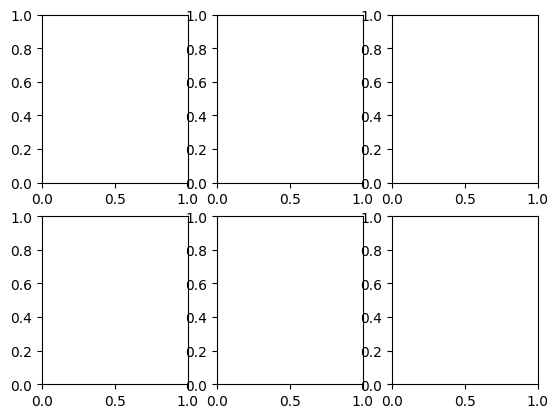

In [6]:
# Plot settings
fig, ax = plt.subplots(nrows=2, ncols=3)

# Data for graphs
data_velocities = [[], [], [], [], [], []]
data_total_acc = [[], [], [], [], [], []]
data_normal_acc = [[], [], [], [], [], []]
data_tan_acc = [[], [], [], [], [], []]
data_ang_vel = [[], [], [], [], [], [], [], []]
colors = ['black', 'red', 'green', 'blue', 'yellow', 'gray', 'pink', 'turquoise']
counter = 0

In [7]:
# Animation
def animate_func(num):
    global counter
    counter += 1  # counter of frames
    for i in ax:  # cleaning plots
        for plot in i:
            plot.clear()
    plt.rc('xtick', labelsize=6)  # fontsize of the tick labels
    plt.rc('ytick', labelsize=6)  # fontsize of the tick labels
    #  Setting limits for axis and titles for each plot
    ax[0][0].set_xlim(-30, 90)
    ax[0][0].set_ylim(-30, 80)
    ax[0][0].set_title('Simulation', fontsize=9)
    ax[0][1].set_xlim(0, 2 * pi)
    ax[0][1].set_ylim(0, 30)
    ax[0][1].set_title('Velocity', fontsize=9)
    ax[0][2].set_xlim(0, 2 * pi)
    ax[0][2].set_ylim(0, 5)
    ax[0][2].set_title('Angular velocity', fontsize=9)
    ax[1][0].set_xlim(0, 2 * pi)
    ax[1][0].set_ylim(0, 90)
    ax[1][0].set_title('Total acceleration', fontsize=9)
    ax[1][1].set_xlim(0, 2 * pi)
    ax[1][1].set_ylim(0, 60)
    ax[1][1].set_title('Normal acceleration', fontsize=9)
    ax[1][2].set_xlim(0, 2 * pi)
    ax[1][2].set_ylim(0, 90)
    ax[1][2].set_title('Tangential acceleration', fontsize=9)

    # Substitute frame into values introduced by sympy
    points_start = [[float(i[0].subs(ang, 0).evalf()), float(i[1].subs(ang, 0).evalf())]
                    for i in points_sympy]
    points = [[float(i[0].subs(ang, num).evalf()), float(i[1].subs(ang, num).evalf())]
              for i in points_sympy]

    # Numerically finding points E and H (Also G_initial and H_initial)
    eqG = [Eq((xG - xF) ** 2 + (yG - yF) ** 2, GF ** 2),
           Eq((xG - O_4[0]) ** 2 + (yG - O_4[1]) ** 2, O_4G ** 2)]
    ansG = solve(eqG, (xG, yG))
    G = np.array([ansG[1][0].subs(xF, points[5][0]).subs(yF, points[5][1]),
                  ansG[1][1].subs(xF, points[5][0]).subs(yF, points[5][1])])
    G_i = np.array([ansG[1][0].subs(xF, points_start[5][0]).subs(yF, points_start[5][1]),
                    ansG[1][1].subs(xF, points_start[5][0]).subs(yF, points_start[5][1])])

    eqH = [Eq((xH - xG) ** 2 + (yH - yG) ** 2, GH ** 2),
           Eq((xH - xF) ** 2 + (yH - yF) ** 2, FH ** 2)]
    ans = solve(eqH, (xH, yH))
    H = np.array([ans[1][0].subs(xF, points[5][0]).subs(yF, points[5][1]).subs(xG, G[0]).subs(yG, G[1]),
                  ans[1][1].subs(xF, points[5][0]).subs(yF, points[5][1]).subs(xG, G[0]).subs(yG, G[1])])
    H_i = np.array(
        [ans[1][0].subs(xF, points_start[5][0]).subs(yF, points_start[5][1]).subs(xG, G_i[0]).subs(yG, G_i[1]),
         ans[1][1].subs(xF, points_start[5][0]).subs(yF, points_start[5][1]).subs(xG, G_i[0]).subs(yG, G_i[1])])

    # Finding velocities and accelerations for points
    velocities = [[float(i[0].subs(ang, num).evalf()), float(i[1].subs(ang, num).evalf())]
                  for i in velocities_sympy]

    accelerations = [[float(i[0].subs(ang, num).evalf()), float(i[1].subs(ang, num).evalf())]
                     for i in accelerations_sympy]

    tan_a = [np.array(velocities[i]) * (np.dot(accelerations[i], velocities[i]) / np.linalg.norm(velocities[i]) ** 2)
             for i in range(6)]

    norm_a = [np.asarray(accelerations[i]) - np.asarray(tan_a[i]) for i in range(6)]

    data_ang_vel[0].append(w)
    data_ang_vel[1].append(np.linalg.norm(np.asarray(velocities[0])-np.asarray(velocities[1])) / AB)
    data_ang_vel[2].append(np.linalg.norm(np.asarray(velocities[0]) - np.asarray(velocities[3])) / AD)
    data_ang_vel[3].append(np.linalg.norm(np.asarray(velocities[3])) / O_2D)
    data_ang_vel[4].append(np.linalg.norm(np.asarray(velocities[3]) - np.asarray(velocities[4])) / DE)
    data_ang_vel[5].append(np.linalg.norm(np.asarray(velocities[4])) / O_3E)
    if counter < 99:
        xF_1 = [float(points_sympy[5][0].subs(ang, t[counter + 1]).evalf()),
                float(points_sympy[5][1].subs(ang, t[counter + 1]).evalf())]
        G_1 = np.array([ansG[1][0].subs(xF, xF_1[0]).subs(yF, xF_1[1]),
                        ansG[1][1].subs(xF, xF_1[0]).subs(yF, xF_1[1])])
        V_g = np.array((G_1 - G) / (t[counter + 1] - t[counter]), dtype=np.float64)
        data_ang_vel[6].append(np.linalg.norm(np.asarray(V_g)) / O_4G)
        data_ang_vel[7].append(np.linalg.norm(np.asarray(V_g) - np.asarray(velocities[5])) / GF)

    # Adding data for graphs of velocities and accelerations
    for i in range(6):
        if counter <= 100:
            data_velocities[i].append((velocities[i][0] ** 2 + velocities[i][1] ** 2) ** 0.5)
            data_total_acc[i].append((accelerations[i][0] ** 2 + accelerations[i][1] ** 2) ** 0.5)
            data_normal_acc[i].append((norm_a[i][0] ** 2 + norm_a[i][1] ** 2) ** 0.5)
            data_tan_acc[i].append((tan_a[i][0] ** 2 + tan_a[i][1] ** 2) ** 0.5)

    # Plotting graphs for velocities and accelerations
    for i in range(6):
        ax[0][1].plot(t[:counter], data_velocities[i], c=colors[i], linewidth=0.7)
        ax[1][0].plot(t[:counter], data_total_acc[i], c=colors[i], linewidth=0.7)
        ax[1][1].plot(t[:counter], data_normal_acc[i], c=colors[i], linewidth=0.7)
        ax[1][2].plot(t[:counter], data_tan_acc[i], c=colors[i], linewidth=0.7)

    if counter < 99:
        for i in range(8):
            ax[0][2].plot(t[:counter], data_ang_vel[i], c=colors[i], linewidth=0.7)

    # Adding all meaningful points
    for point in points:
        ax[0][0].plot(point[0], point[1], marker="o", markersize=3, markeredgecolor="black", markerfacecolor="black")
    ax[0][0].plot(G[0], G[1], marker="o", markersize=3, markeredgecolor="black", markerfacecolor="black")
    ax[0][0].plot(H[0], H[1], marker="o", markersize=3, markeredgecolor="black", markerfacecolor="black")

    # Adding all initial points
    for point in points_start:
        ax[0][0].plot(point[0], point[1], marker="o", markersize=3, markeredgecolor="black", markerfacecolor="black")
    ax[0][0].plot(G_i[0], G_i[1], marker="o", markersize=3, markeredgecolor="black", markerfacecolor="black")
    ax[0][0].plot(H_i[0], H_i[1], marker="o", markersize=3, markeredgecolor="black", markerfacecolor="black")

    # Adding all points that are not moving
    for point in const_points:
        ax[0][0].plot(point[0], point[1], marker="o", markersize=3, markeredgecolor="black", markerfacecolor="black")

    # List of all lines we need to draw
    lines = [(O_1, points[0]), (points[0], points[1]), (points[0], points[3]), (O_2, points[3]), (points[3], points[4]),
             (O_3, points[4]), (points[5], H), (O_4, G), (G, H), (G, points[5])]

    # List of all lines of the initial state
    lines_start = [(O_1, points_start[0]), (points_start[0], points_start[1]), (points_start[0], points_start[3]),
                   (O_2, points_start[3]), (points_start[3], points_start[4]), (O_3, points_start[4]),
                   (points_start[5], H_i),
                   (O_4, G_i), (G_i, H_i), (G_i, points[5])]

    # Drawing all lines
    for line in lines:
        ax[0][0].plot([line[0][0], line[1][0]], [line[0][1], line[1][1]], linewidth=0.7, color="blue")  # Line PB

    for line in lines_start:
        ax[0][0].plot([line[0][0], line[1][0]], [line[0][1], line[1][1]], linewidth=0.7, color="blue",
                      linestyle="dashed")

    # Adding points names
    for coord, name in zip(points, ['A', 'B', 'C', 'D', 'E', 'F']):
        ax[0][0].text(coord[0], coord[1] + 3, name, fontsize=6)
    ax[0][0].text(G[0], G[1] + 3, 'G', fontsize=6)
    ax[0][0].text(H[0], H[1] + 3, 'H', fontsize=6)
    for name in points_names:
        ax[0][0].text(name[0][0], name[0][1] + 3, name[1], fontsize=6)

    # Drawing velocity vectors
    for point, velocity in zip(points, velocities):
        ax[0][0].quiver([point[0]], [point[1]], [velocity[0]], [velocity[1]],  # Point A
                        scale=2, scale_units='xy', color="red")

    # Drawing total acceleration vectors
    for coord, acceleration in zip(points, accelerations):
        ax[0][0].quiver(coord[0], coord[1], acceleration[0], acceleration[1],  # Point A
                        scale=2, scale_units='xy', color="purple")

    # Drawing normal acceleration vectors
    for coord, norm in zip(points, norm_a):
        ax[0][0].quiver(coord[0], coord[1], norm[0], norm[1],  # Point A
                        scale=2, scale_units='xy', color="green")

    # Drawing tangential acceleration vectors
    for coord, tan in zip(points, tan_a):
        ax[0][0].quiver(coord[0], coord[1], tan[0], tan[1],  # Point A
                        scale=2, scale_units='xy', color="black")

    # Specification of graph notation
    ax[0][0].add_patch(pltp.Rectangle((-25, 75), 6, 3, color='blue'))
    ax[0][0].text(-17, 75, 'trajectory', fontsize=6)
    ax[0][0].add_patch(pltp.Rectangle((-25, 71), 6, 3, color='red'))
    ax[0][0].text(-17, 71, 'velocity', fontsize=6)
    ax[0][0].add_patch(pltp.Rectangle((-25, 67), 6, 3, color='purple'))
    ax[0][0].text(-17, 67, 'acceleration', fontsize=6)
    ax[0][0].add_patch(pltp.Rectangle((-25, 63), 6, 3, color='green'))
    ax[0][0].text(-17, 63, 'normal acceleration', fontsize=6)
    ax[0][0].add_patch(pltp.Rectangle((-25, 59), 6, 3, color='black'))
    ax[0][0].text(-17, 59, 'tangential acceleration', fontsize=6)

    ax[0][2].add_patch(pltp.Rectangle((0.2, 4.80), 0.3, 0.15, color=colors[0]))
    ax[0][2].text(0.6, 4.80, 'A / $O_2$A', fontsize=5)
    ax[0][2].add_patch(pltp.Rectangle((0.2, 4.60), 0.3, 0.15, color=colors[1]))
    ax[0][2].text(0.6, 4.60, 'B / AB', fontsize=5)
    ax[0][2].add_patch(pltp.Rectangle((0.2, 4.40), 0.3, 0.15, color=colors[2]))
    ax[0][2].text(0.6, 4.40, 'C / AD', fontsize=5)
    ax[0][2].add_patch(pltp.Rectangle((0.2, 4.20), 0.3, 0.15, color=colors[3]))
    ax[0][2].text(0.6, 4.20, 'D / $O_2$D', fontsize=5)
    ax[0][2].add_patch(pltp.Rectangle((0.2, 4.00), 0.3, 0.15, color=colors[4]))
    ax[0][2].text(0.6, 4.00, 'E / DE', fontsize=5)
    ax[0][2].add_patch(pltp.Rectangle((0.2, 3.80), 0.3, 0.15, color=colors[5]))
    ax[0][2].text(0.6, 3.80, 'F / $O_3$E', fontsize=5)
    ax[0][2].add_patch(pltp.Rectangle((0.2, 3.60), 0.3, 0.15, color=colors[6]))
    ax[0][2].text(0.6, 3.60, '$O_4$G', fontsize=5)
    ax[0][2].add_patch(pltp.Rectangle((0.2, 3.40), 0.3, 0.15, color=colors[7]))
    ax[0][2].text(0.6, 3.40, 'GF / GH / FH', fontsize=5)

In [8]:
#  Starting animation and saving plots
line_ani = FuncAnimation(fig, animate_func, frames=t)
writergif = animation.PillowWriter(fps=60)
line_ani.save("task1.gif", dpi=300, writer=writergif)
plt.close('all')